# ABCD Yields

In [1]:
import uproot
import ROOT as r
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

Welcome to JupyROOT 6.30/04


In [2]:
def get_abcd(file, tree="Events"):
    with uproot.open(file) as f:
        df = f.get(tree).arrays(library="pd")
        
    BDT_CUT = 0.56
    DNN_CUT = 0.92

    a = sum(df[(df.VBSBDTscore > BDT_CUT) & (df.abcdnet_score > DNN_CUT)].weight)
    b = sum(df[(df.VBSBDTscore < BDT_CUT) & (df.abcdnet_score > DNN_CUT)].weight)
    c = sum(df[(df.VBSBDTscore > BDT_CUT) & (df.abcdnet_score < DNN_CUT)].weight)
    d = sum(df[(df.VBSBDTscore < BDT_CUT) & (df.abcdnet_score < DNN_CUT)].weight)

    if "data" in file:
        a = "BLINDED"

    print(f"Actual A: {a}")
    print(f"Region B: {b}")
    print(f"Region C: {c}")
    print(f"Region D: {d}")
    print(f"Predicted A: {b * c / d}")

    return b, c, d, a

# DATA

In [15]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/data_bdt_abcdnet.root")

Actual A: BLINDED
Region B: 11
Region C: 75
Region D: 1016
Predicted A: 0.812007874015748


Text(72.70833333333333, 1, 'ABCDNet Score')

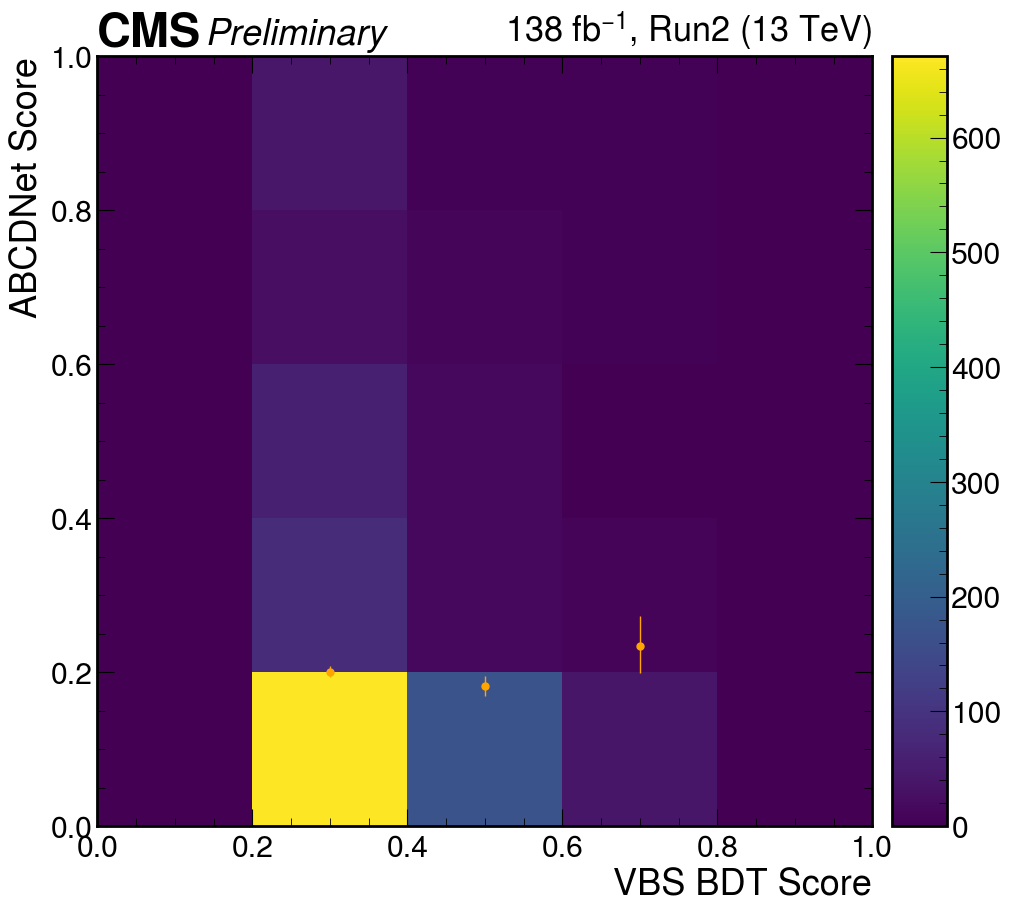

In [16]:
df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/data_bdt_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax)
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="orange")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")

# SIG

In [3]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_bdt_abcdnet.root")

Actual A: 3.6227467690741406
Region B: 0.8204906918733832
Region C: 1.0954239576546596
Region D: 0.46639173399584993
Predicted A: 1.9271035385004247


Text(72.70833333333333, 1, 'ABCDNet Score')

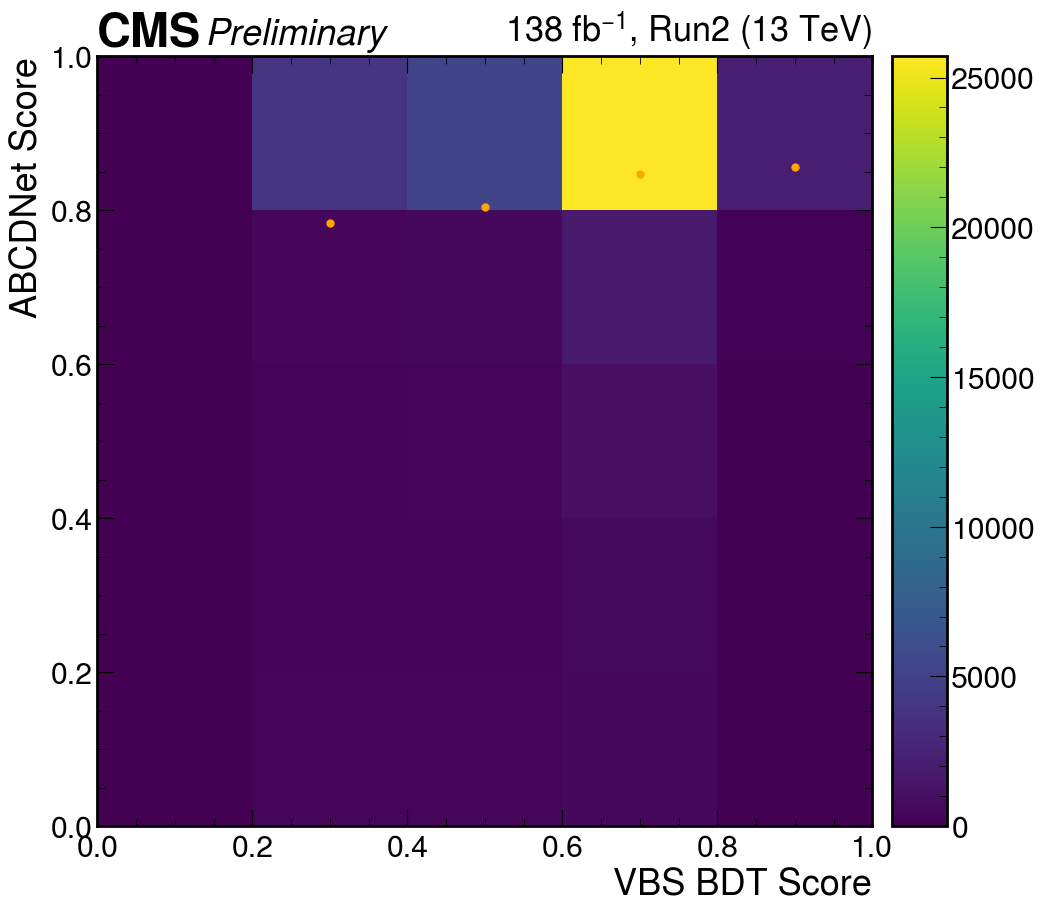

In [4]:
df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_bdt_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax)
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="orange")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")

# BKG

In [18]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/bkg_bdt_abcdnet.root")

Actual A: 3.123299759662902
Region B: 40.268181860975446
Region C: 152.257012159449
Region D: 2596.96995018036
Predicted A: 2.3608717747464256


Text(72.70833333333333, 1, 'ABCDNet Score')

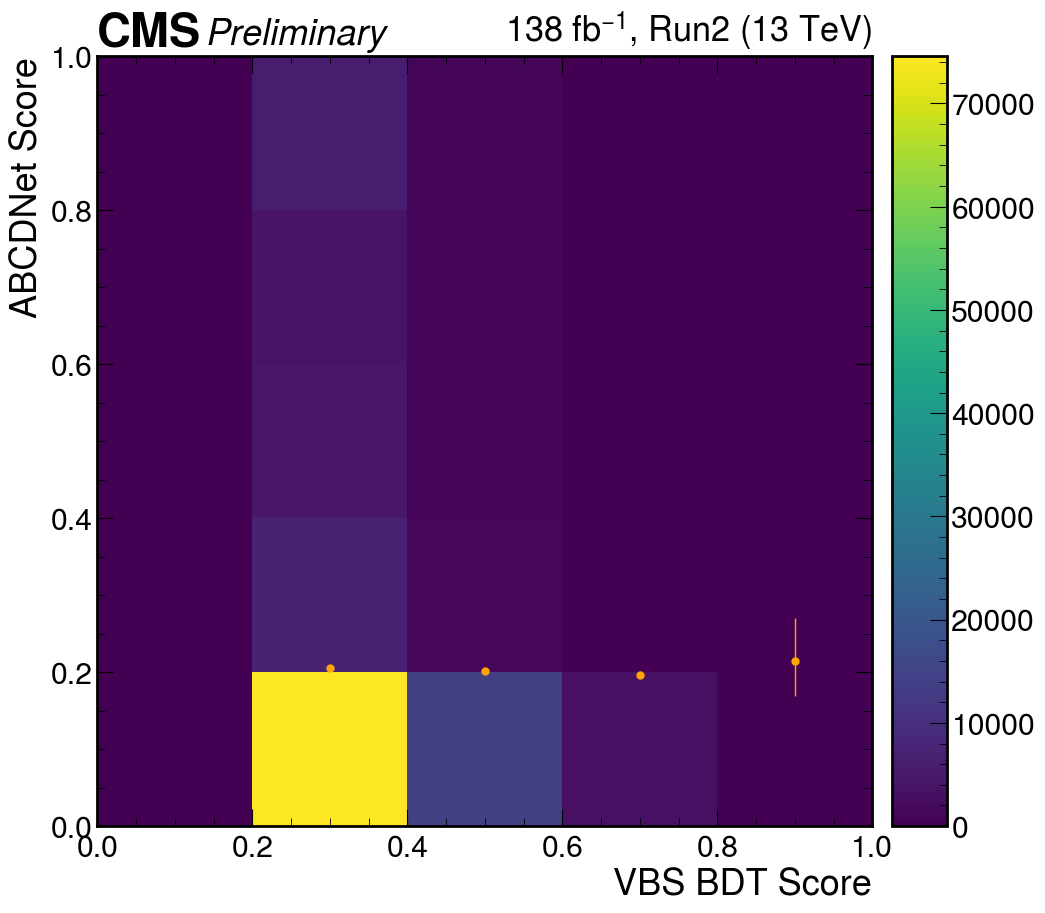

In [17]:
df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/bkg_bdt_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax)
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="orange")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")